<a href="https://colab.research.google.com/github/NadhemBenhadjali/-Income-Prediction-for-Adults-and-Corresponding-Simple-Interest-Table/blob/main/Finance_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import StandardScaler , LabelEncoder
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Reading Data

In [3]:
data = pd.read_csv("/content/drive/MyDrive/finance/adult.csv")

In [4]:
data.head(30)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


In [5]:
data.education.value_counts()

HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64

In [6]:
data.occupation.value_counts()

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

In [7]:
data.workclass.value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

# Data Preprocessing

In [8]:
# Handle missing data and apply One-Hot Encoding to categorical variables
data = pd.get_dummies(data, columns=['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country'])

In [9]:
X = data.drop(columns=['income'])  # Replace 'income' with your target column name
y = data['income']

In [10]:
y

0        <=50K
1        <=50K
2         >50K
3         >50K
4        <=50K
         ...  
48837    <=50K
48838     >50K
48839    <=50K
48840    <=50K
48841     >50K
Name: income, Length: 48842, dtype: object

In [11]:

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize Logistic Regression classifier
logreg_classifier = LogisticRegression()

# Train the Logistic Regression classifier
logreg_classifier.fit(X_train, y_train)


LogisticRegression()

Accuracy: 85.74%


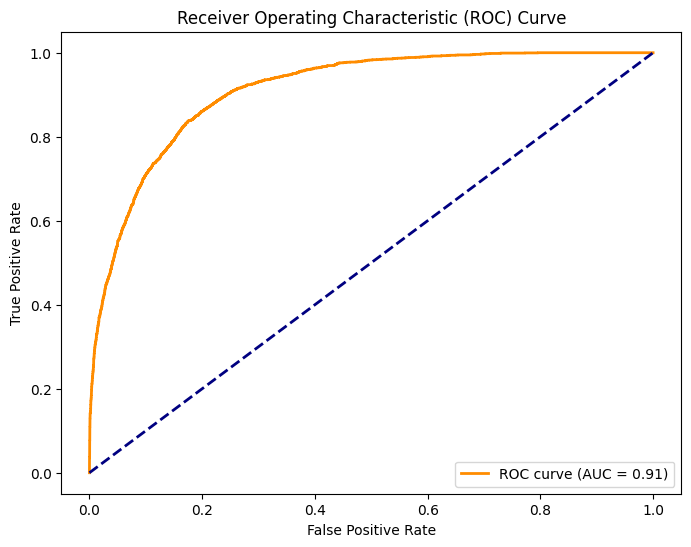

AUC Score: 0.9107146589781812


In [12]:
# Get predicted probabilities for the positive class (income > 50K)
y_scores = logreg_classifier.predict_proba(X_test)[:, 1]

# Convert probabilities to binary predictions (0 or 1)
y_pred = (y_scores > 0.5).astype(int)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
print("AUC Score:", roc_auc)

In [13]:
y


array([0, 0, 1, ..., 0, 0, 1])

In [14]:
income = [np.random.randint(0, 50001)  if i==0 else np.random.randint(50001, 500000) for i in y]

In [15]:
income

[39689,
 13035,
 69996,
 172460,
 37341,
 18694,
 26580,
 151983,
 8289,
 17991,
 306171,
 38089,
 43748,
 15476,
 93188,
 490596,
 31764,
 2479,
 45391,
 139669,
 447050,
 5073,
 9037,
 49741,
 35537,
 436469,
 44360,
 270,
 11528,
 5712,
 495513,
 36761,
 3882,
 7635,
 15176,
 32900,
 304050,
 1655,
 4607,
 33201,
 314959,
 433952,
 5720,
 30644,
 7730,
 343750,
 7405,
 37999,
 16344,
 26910,
 47243,
 9914,
 22292,
 87110,
 26803,
 21197,
 24999,
 55830,
 369588,
 35514,
 6409,
 45175,
 39040,
 33399,
 28499,
 4761,
 338853,
 12567,
 16318,
 1259,
 189164,
 39712,
 42660,
 36652,
 3541,
 28825,
 8017,
 42309,
 31090,
 26071,
 11358,
 28473,
 3322,
 124693,
 28312,
 41180,
 27919,
 221115,
 37742,
 241468,
 32564,
 18880,
 199247,
 30187,
 9993,
 41457,
 36166,
 43658,
 348947,
 1217,
 6057,
 43,
 21482,
 24111,
 45521,
 11162,
 44903,
 39365,
 37567,
 29835,
 12518,
 10771,
 420777,
 940,
 42651,
 11971,
 627,
 8091,
 32071,
 291264,
 33656,
 16022,
 33852,
 8841,
 31918,
 3101,
 316

In [16]:
salaries=income[1:10]
salaries

[13035, 69996, 172460, 37341, 18694, 26580, 151983, 8289, 17991]

# finance part

Enter the annual interest rate (in decimal): 0.01
Enter the duration in years: 10
The total amount after 10 years for an initial amount of 13035 is: 14338.5


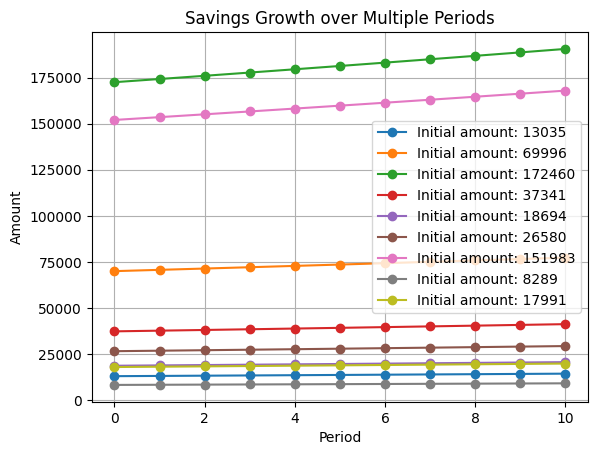

In [17]:
# Function to calculate simple interests for a period
def calculate_simple_interests(initial_amount, interest_rate, duration):
    interests = initial_amount * interest_rate * duration
    total_amount = initial_amount + interests
    return interests, total_amount

# Function to simulate savings growth over multiple periods
def simulate_growth(initial_amount, interest_rate, duration):
    amounts = [initial_amount]
    interest_totals = []
    for period in range(1, duration + 1):
        interests, _ = calculate_simple_interests(initial_amount, interest_rate, 1)
        initial_amount += interests  # Update the amount each year
        amounts.append(initial_amount)
        interest_totals.append(interests)
    return amounts, interest_totals

table_data = {'Initial Amount': [],
              'Duration (years)': [],
              'Interests': [],
              'Total Amount': []}

interest_rate = float(input("Enter the annual interest rate (in decimal): "))
duration = int(input("Enter the duration in years: "))
_, total_amount = calculate_simple_interests(salaries[0], interest_rate, duration)
print(f"The total amount after {duration} years for an initial amount of {salaries[0]} is: {total_amount}")

for salary in salaries:
    amounts, interest_totals = simulate_growth(salary, interest_rate, duration)
    periods = list(range(duration + 1))

    # Add data to the table
    for period, interest, amount in zip(periods[1:], interest_totals, amounts[1:]):
        table_data['Initial Amount'].append(amounts[period - 1])
        table_data['Duration (years)'].append(period)
        table_data['Interests'].append(interest)
        table_data['Total Amount'].append(amount)

    # Plot the savings growth curve
    plt.plot(periods, amounts, marker='o', label=f"Initial amount: {salary}")

plt.xlabel('Period')
plt.ylabel('Amount')
plt.title('Savings Growth over Multiple Periods')
plt.legend()
plt.grid(True)
plt.show()

# Create a summary table using pandas
df = pd.DataFrame(table_data)

In [18]:
df.head(20)

,Initial Amount,Duration (years),Interests,Total Amount
0,13035.000000,1,130.350000,13165.350000
1,13165.350000,2,131.653500,13297.003500
2,13297.003500,3,132.970035,13429.973535
3,13429.973535,4,134.299735,13564.273270
4,13564.273270,5,135.642733,13699.916003
5,13699.916003,6,136.999160,13836.915163
6,13836.915163,7,138.369152,13975.284315
7,13975.284315,8,139.752843,14115.037158
8,14115.037158,9,141.150372,14256.187529
9,14256.187529,10,142.561875,14398.749405
